In [61]:
import numpy as np
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn import linear_model
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_squared_error
from sklearn.metrics import r2_score
from prettytable import PrettyTable


In [2]:
#We load the .csv
df = pd.read_csv("winequality-red.csv", sep=";")
df.head()


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [3]:
df.shape


(1599, 12)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.isnull().sum()


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
null_values:list=['?',' ','',-999,-9999,'-','AN',-1]
for null_value in null_values:
  print(f'Value count for null type "{null_value}" is :',(df==null_value).sum().sum())

Value count for null type "?" is : 0
Value count for null type " " is : 0
Value count for null type "" is : 0
Value count for null type "-999" is : 0
Value count for null type "-9999" is : 0
Value count for null type "-" is : 0
Value count for null type "AN" is : 0
Value count for null type "-1" is : 0


5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

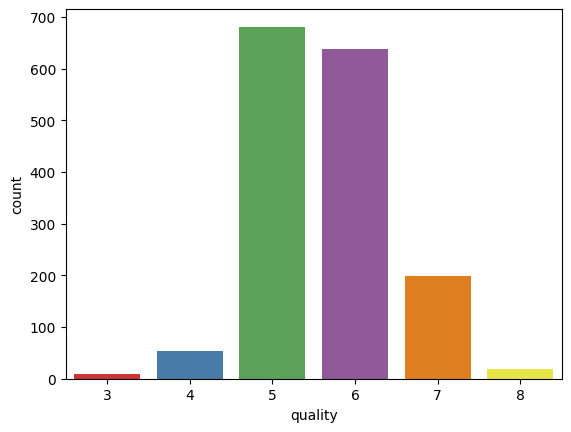

In [7]:
#visualizing the different quality values and how many wines have that rating in our dataset
sns.countplot(x='quality', data=df, palette='Set1')
df['quality'].value_counts()

What is the distribution of the wine quality scores?

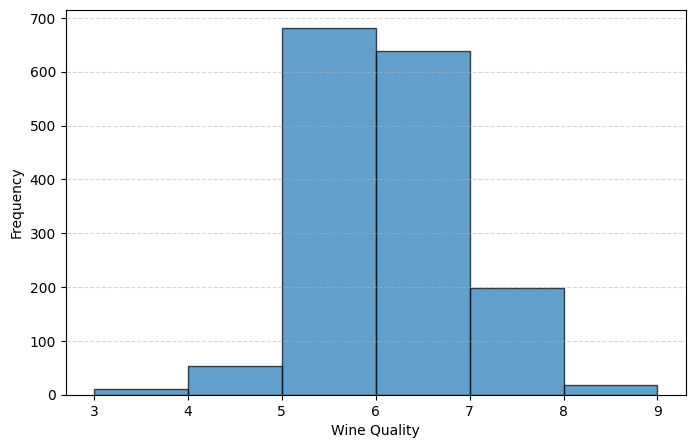

In [8]:
plt.figure(figsize=(8, 5))
plt.hist(df['quality'], bins=range(3, 10), edgecolor='k', alpha=0.7)
plt.xlabel('Wine Quality')
plt.ylabel('Frequency')
plt.xticks(range(3, 10))
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In [9]:
#five number summary
df.describe(include="all")

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

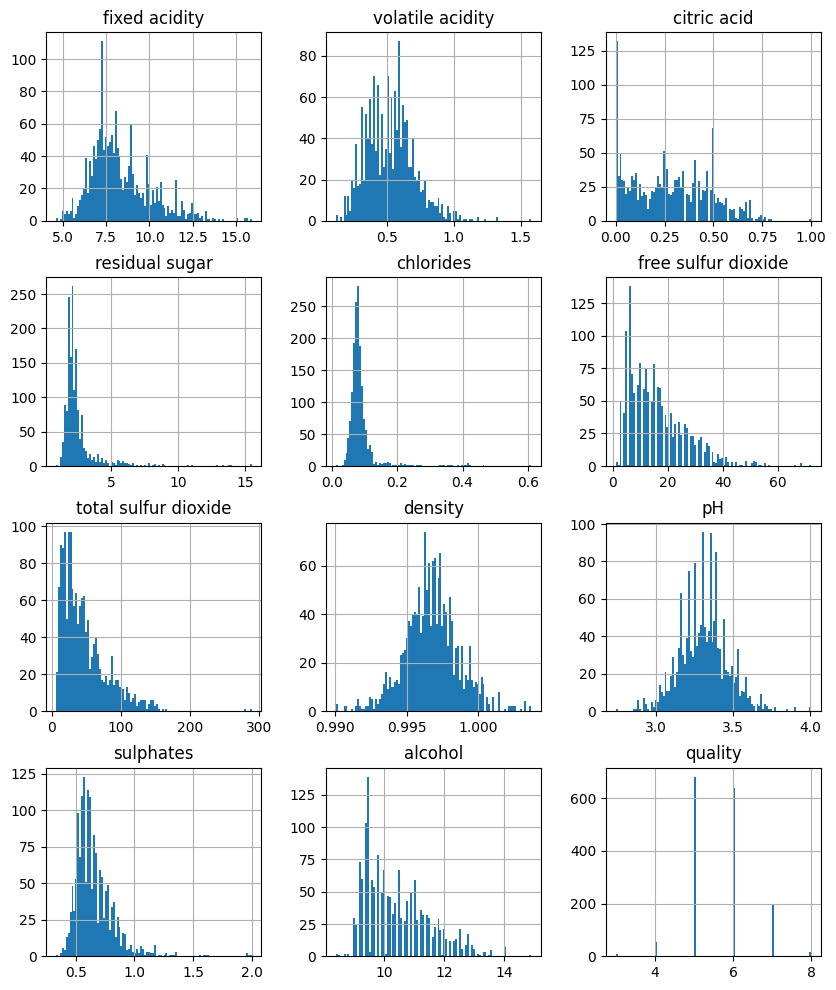

In [10]:
df.hist(bins=100,figsize=(10,12))
plt.show()

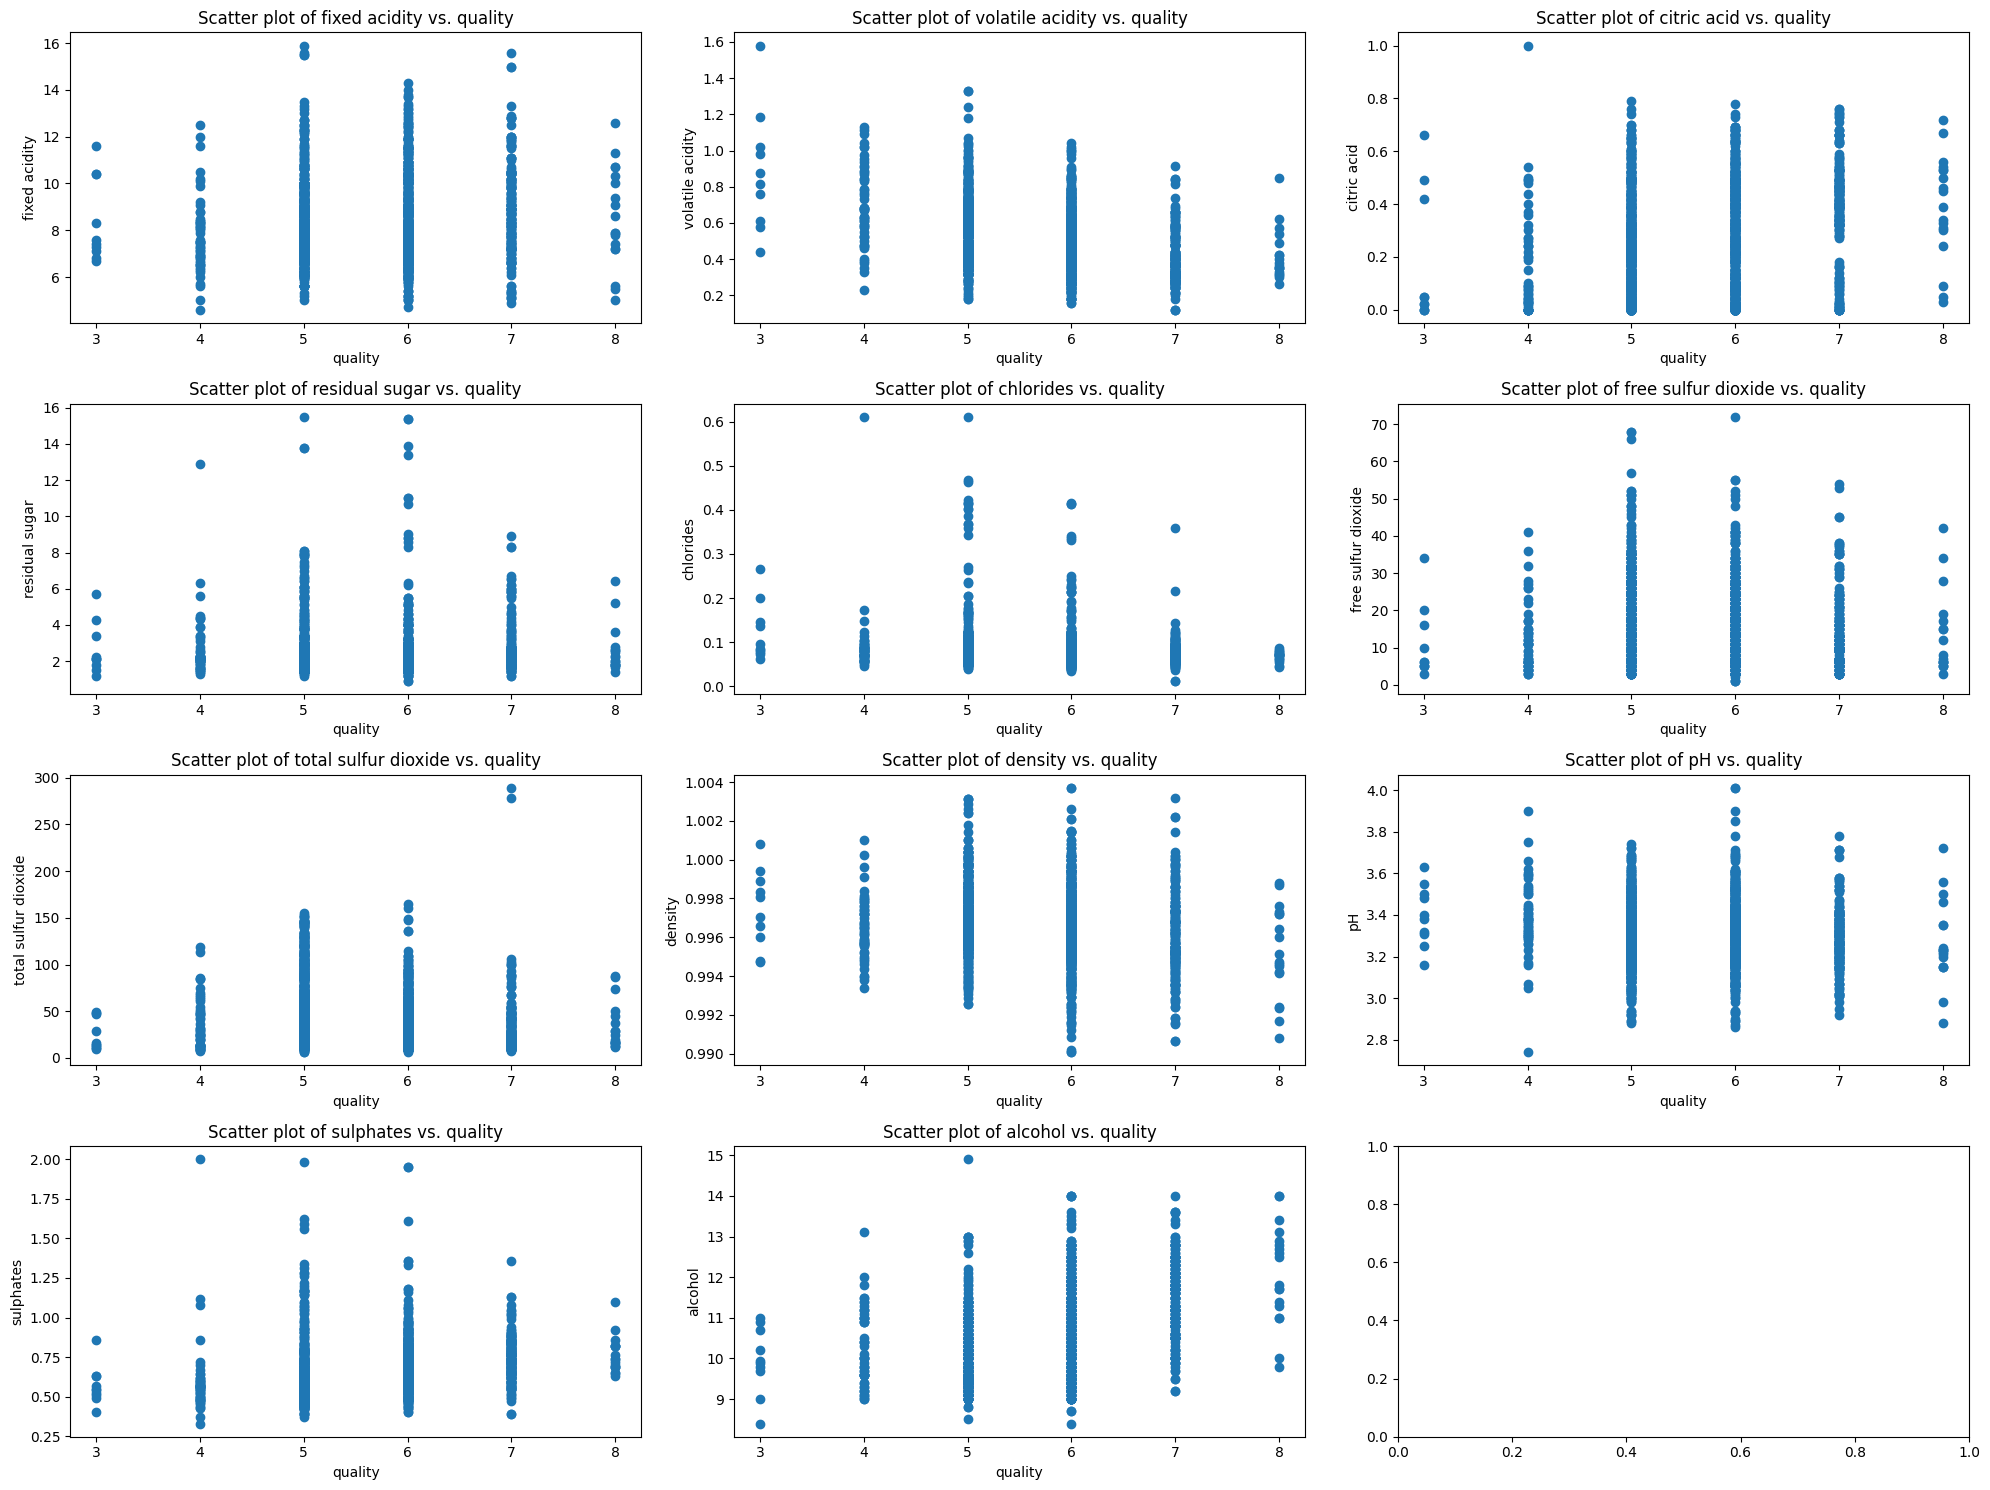

In [11]:
num_rows = 4
num_cols = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))
fig.subplots_adjust(hspace=0.5)

columns_to_plot = df.drop(["quality"], axis=1).columns
for i, ax in enumerate(axes.flat):
    if i < len(columns_to_plot):
        column = columns_to_plot[i]
        ax.scatter(y=df[column], x=df['quality'])
        ax.set_ylabel(column)
        ax.set_xlabel("quality")
        ax.set_title(f'Scatter plot of {column} vs. quality')


plt.tight_layout()
plt.show()

What are the relationships between the different features?

<Figure size 1500x800 with 0 Axes>

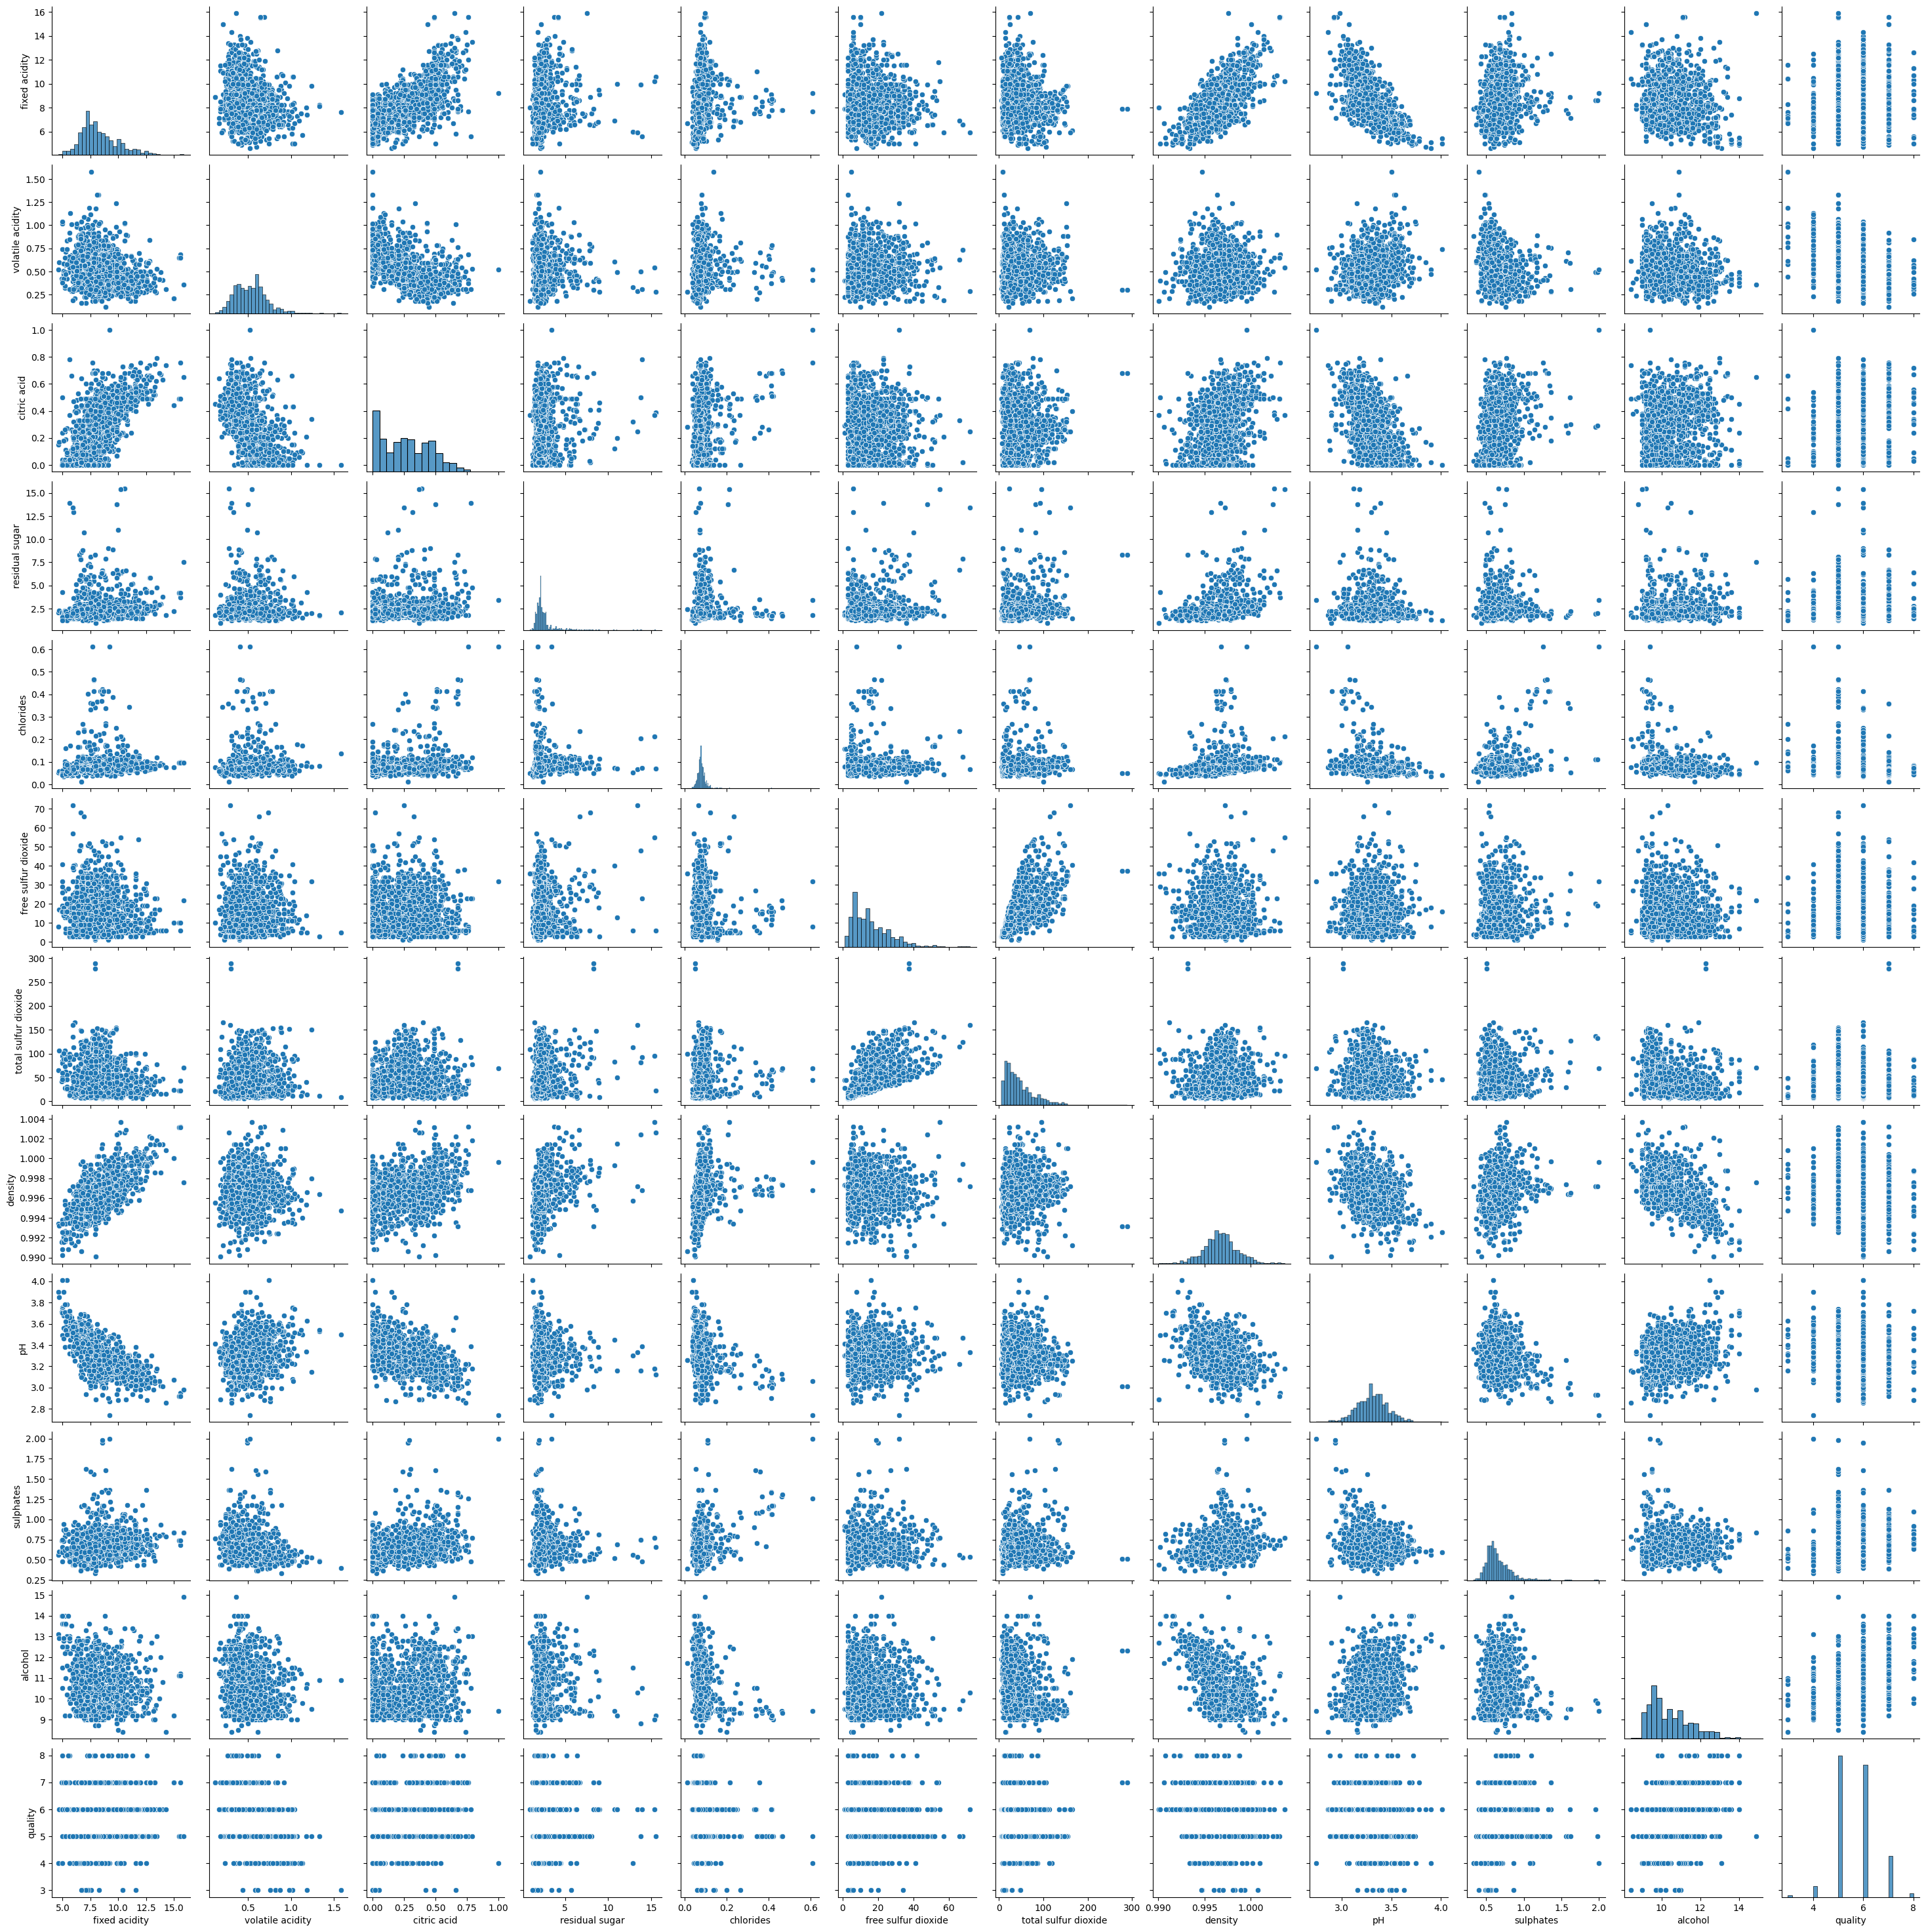

In [12]:
plt.figure(figsize=(15,8))
sns.pairplot(data=df)

In [13]:
unique_values = df["quality"].unique()
unique_values.sort()
print("Unique values in 'quality' column:", unique_values)
dfG=df.groupby(["quality"]).mean()
##Here we taken mean value of all column with respect to the quality.
dfG["quality"]=unique_values
dfG

Unique values in 'quality' column: [3 4 5 6 7 8]


fixed acidity  volatile acidity  citric acid  residual sugar  \
quality                                                                 
3             8.360000          0.884500     0.171000        2.635000   
4             7.779245          0.693962     0.174151        2.694340   
5             8.167254          0.577041     0.243686        2.528855   
6             8.347179          0.497484     0.273824        2.477194   
7             8.872362          0.403920     0.375176        2.720603   
8             8.566667          0.423333     0.391111        2.577778   

         chlorides  free sulfur dioxide  total sulfur dioxide   density  \
quality                                                                   
3         0.122500            11.000000             24.900000  0.997464   
4         0.090679            12.264151             36.245283  0.996542   
5         0.092736            16.983847             56.513950  0.997104   
6         0.084956            15.711599             40.869906  0.996615   
7         0.076588            14.045226             35.020101  0.996104   
8         0.068444            13.277778             33.444444  0.995212   

               pH  sulphates    alcohol  quality  
quality                                           
3        3.398000   0.570000   9.955000        3  
4        3.381509   0.596415  10.265094        4  
5        3.304949   0.620969   9.899706        5  
6        3.318072   0.675329  10.629519        6  
7        3.290754   0.741256  11.465913        7  
8        3.267222   0.767778  12.094444        8

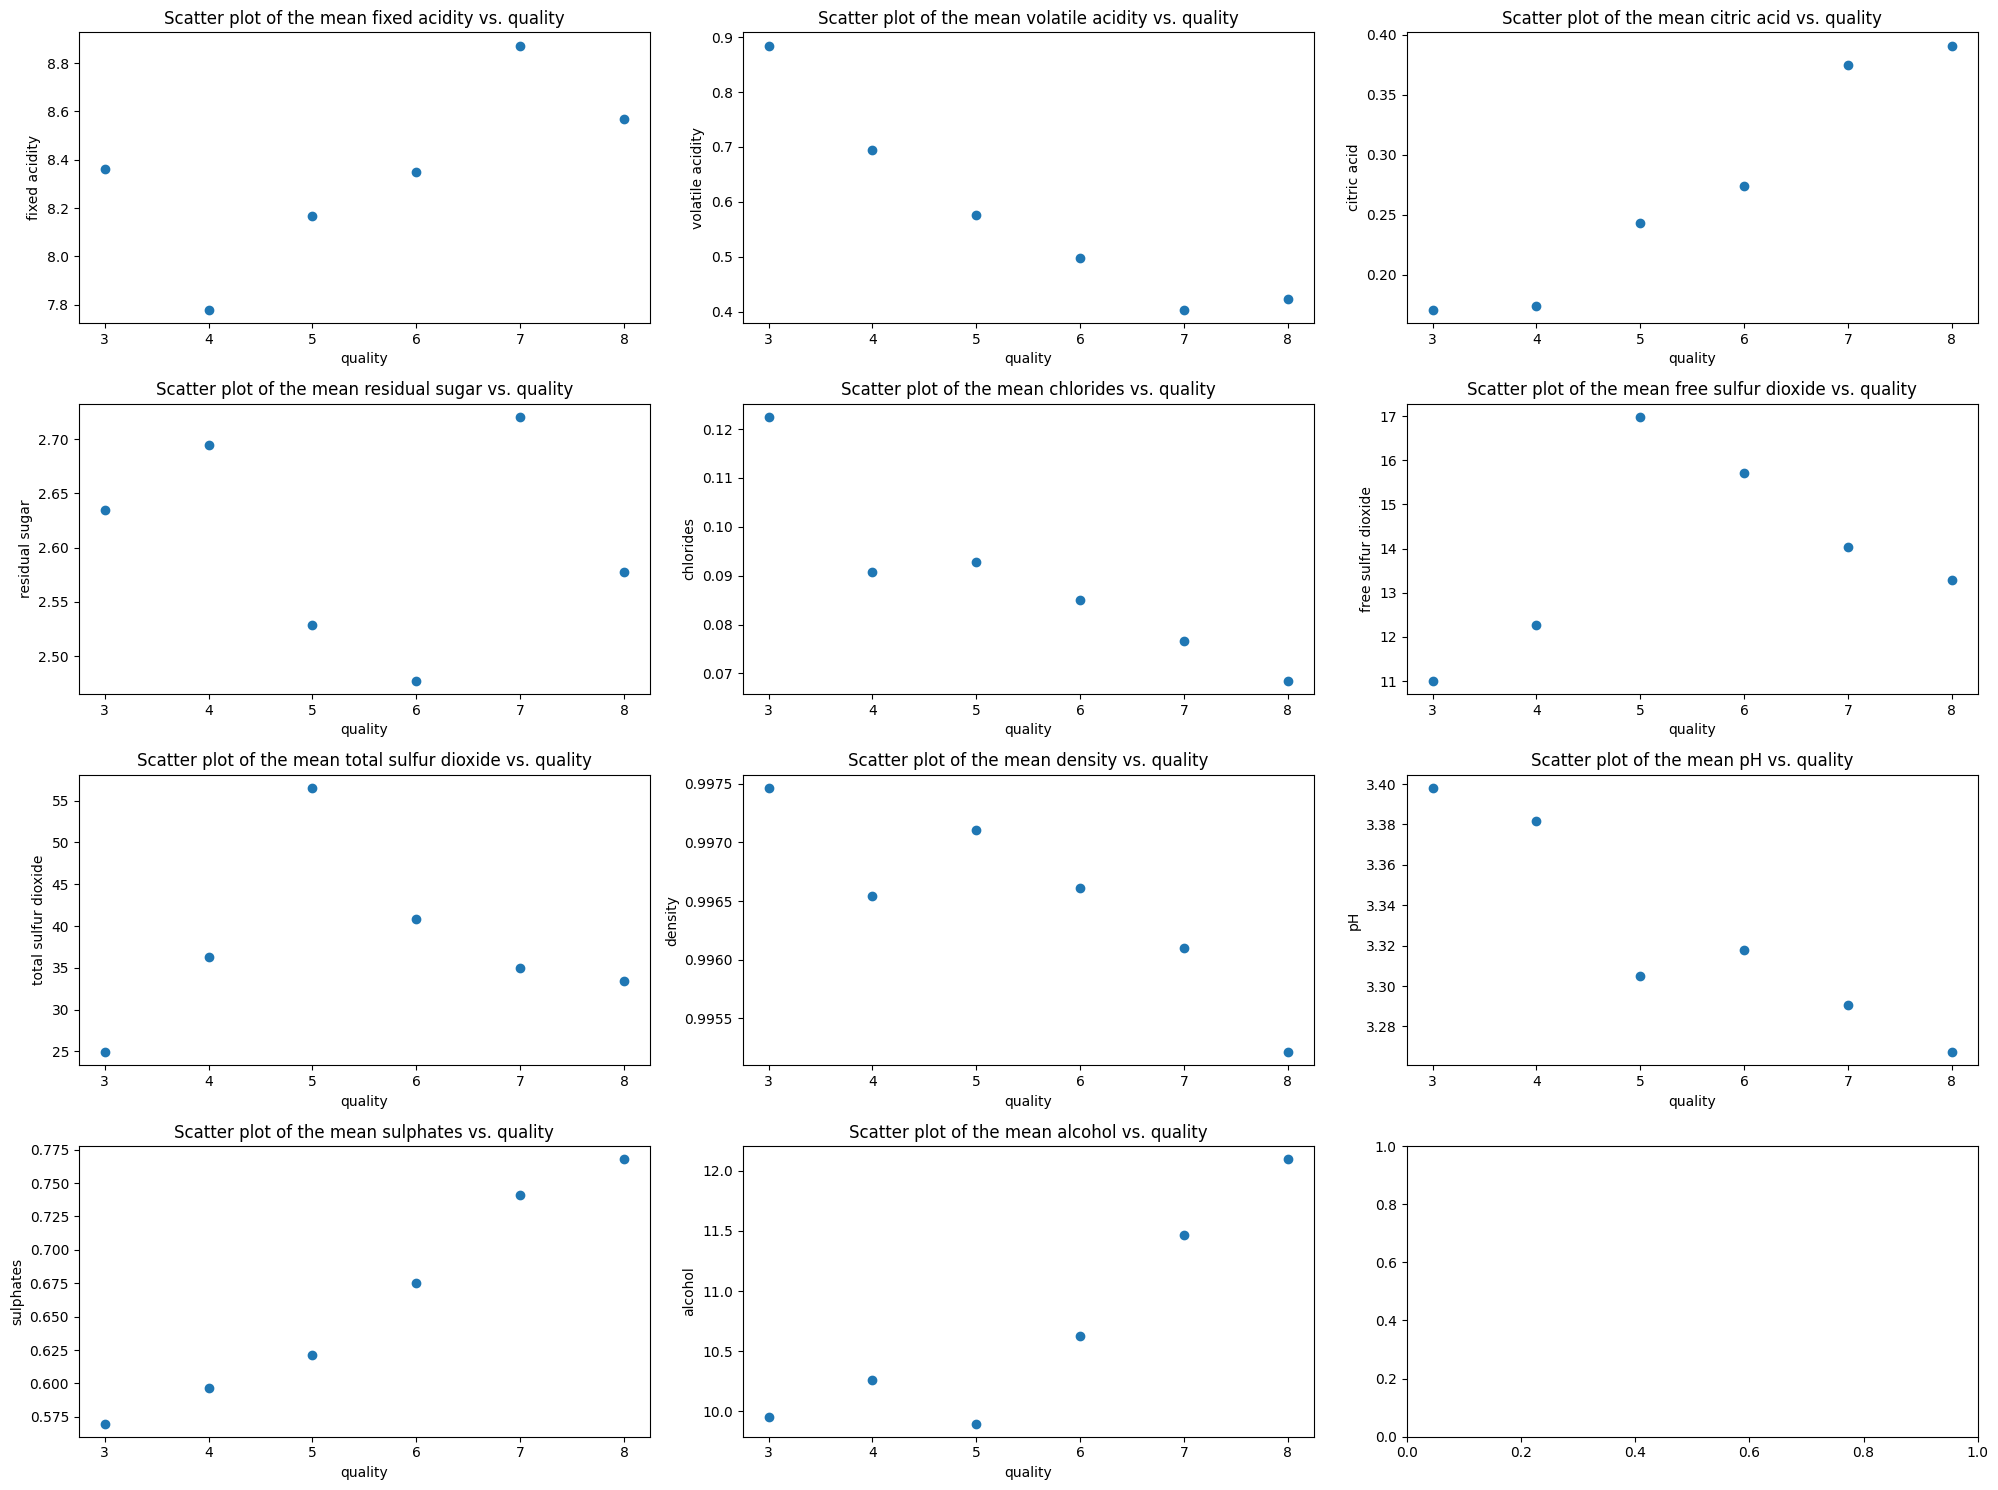

In [14]:
num_rows = 4
num_cols = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))
fig.subplots_adjust(hspace=0.5)

columns_to_plot = dfG.drop(["quality"], axis=1).columns
for i, ax in enumerate(axes.flat):
    if i < len(columns_to_plot):
        column = columns_to_plot[i]
        ax.scatter(y=dfG[column], x=dfG['quality'])
        ax.set_ylabel(column)
        ax.set_xlabel("quality")
        ax.set_title(f'Scatter plot of the mean {column} vs. quality')


plt.tight_layout()
plt.show()

In [15]:
unique_values = df["quality"].unique()
unique_values.sort()
print("Unique values in 'quality' column:", unique_values)
dfG=df.groupby(["quality"]).max()
##Here we taken max  value of all column with respect to the quality.
dfG["quality"]=unique_values
dfG

Unique values in 'quality' column: [3 4 5 6 7 8]


fixed acidity  volatile acidity  citric acid  residual sugar  \
quality                                                                 
3                 11.6             1.580         0.66             5.7   
4                 12.5             1.130         1.00            12.9   
5                 15.9             1.330         0.79            15.5   
6                 14.3             1.040         0.78            15.4   
7                 15.6             0.915         0.76             8.9   
8                 12.6             0.850         0.72             6.4   

         chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
quality                                                                        
3            0.267                 34.0                  49.0  1.00080  3.63   
4            0.610                 41.0                 119.0  1.00100  3.90   
5            0.611                 68.0                 155.0  1.00315  3.74   
6            0.415                 72.0                 165.0  1.00369  4.01   
7            0.358                 54.0                 289.0  1.00320  3.78   
8            0.086                 42.0                  88.0  0.99880  3.72   

         sulphates  alcohol  quality  
quality                               
3             0.86     11.0        3  
4             2.00     13.1        4  
5             1.98     14.9        5  
6             1.95     14.0        6  
7             1.36     14.0        7  
8             1.10     14.0        8

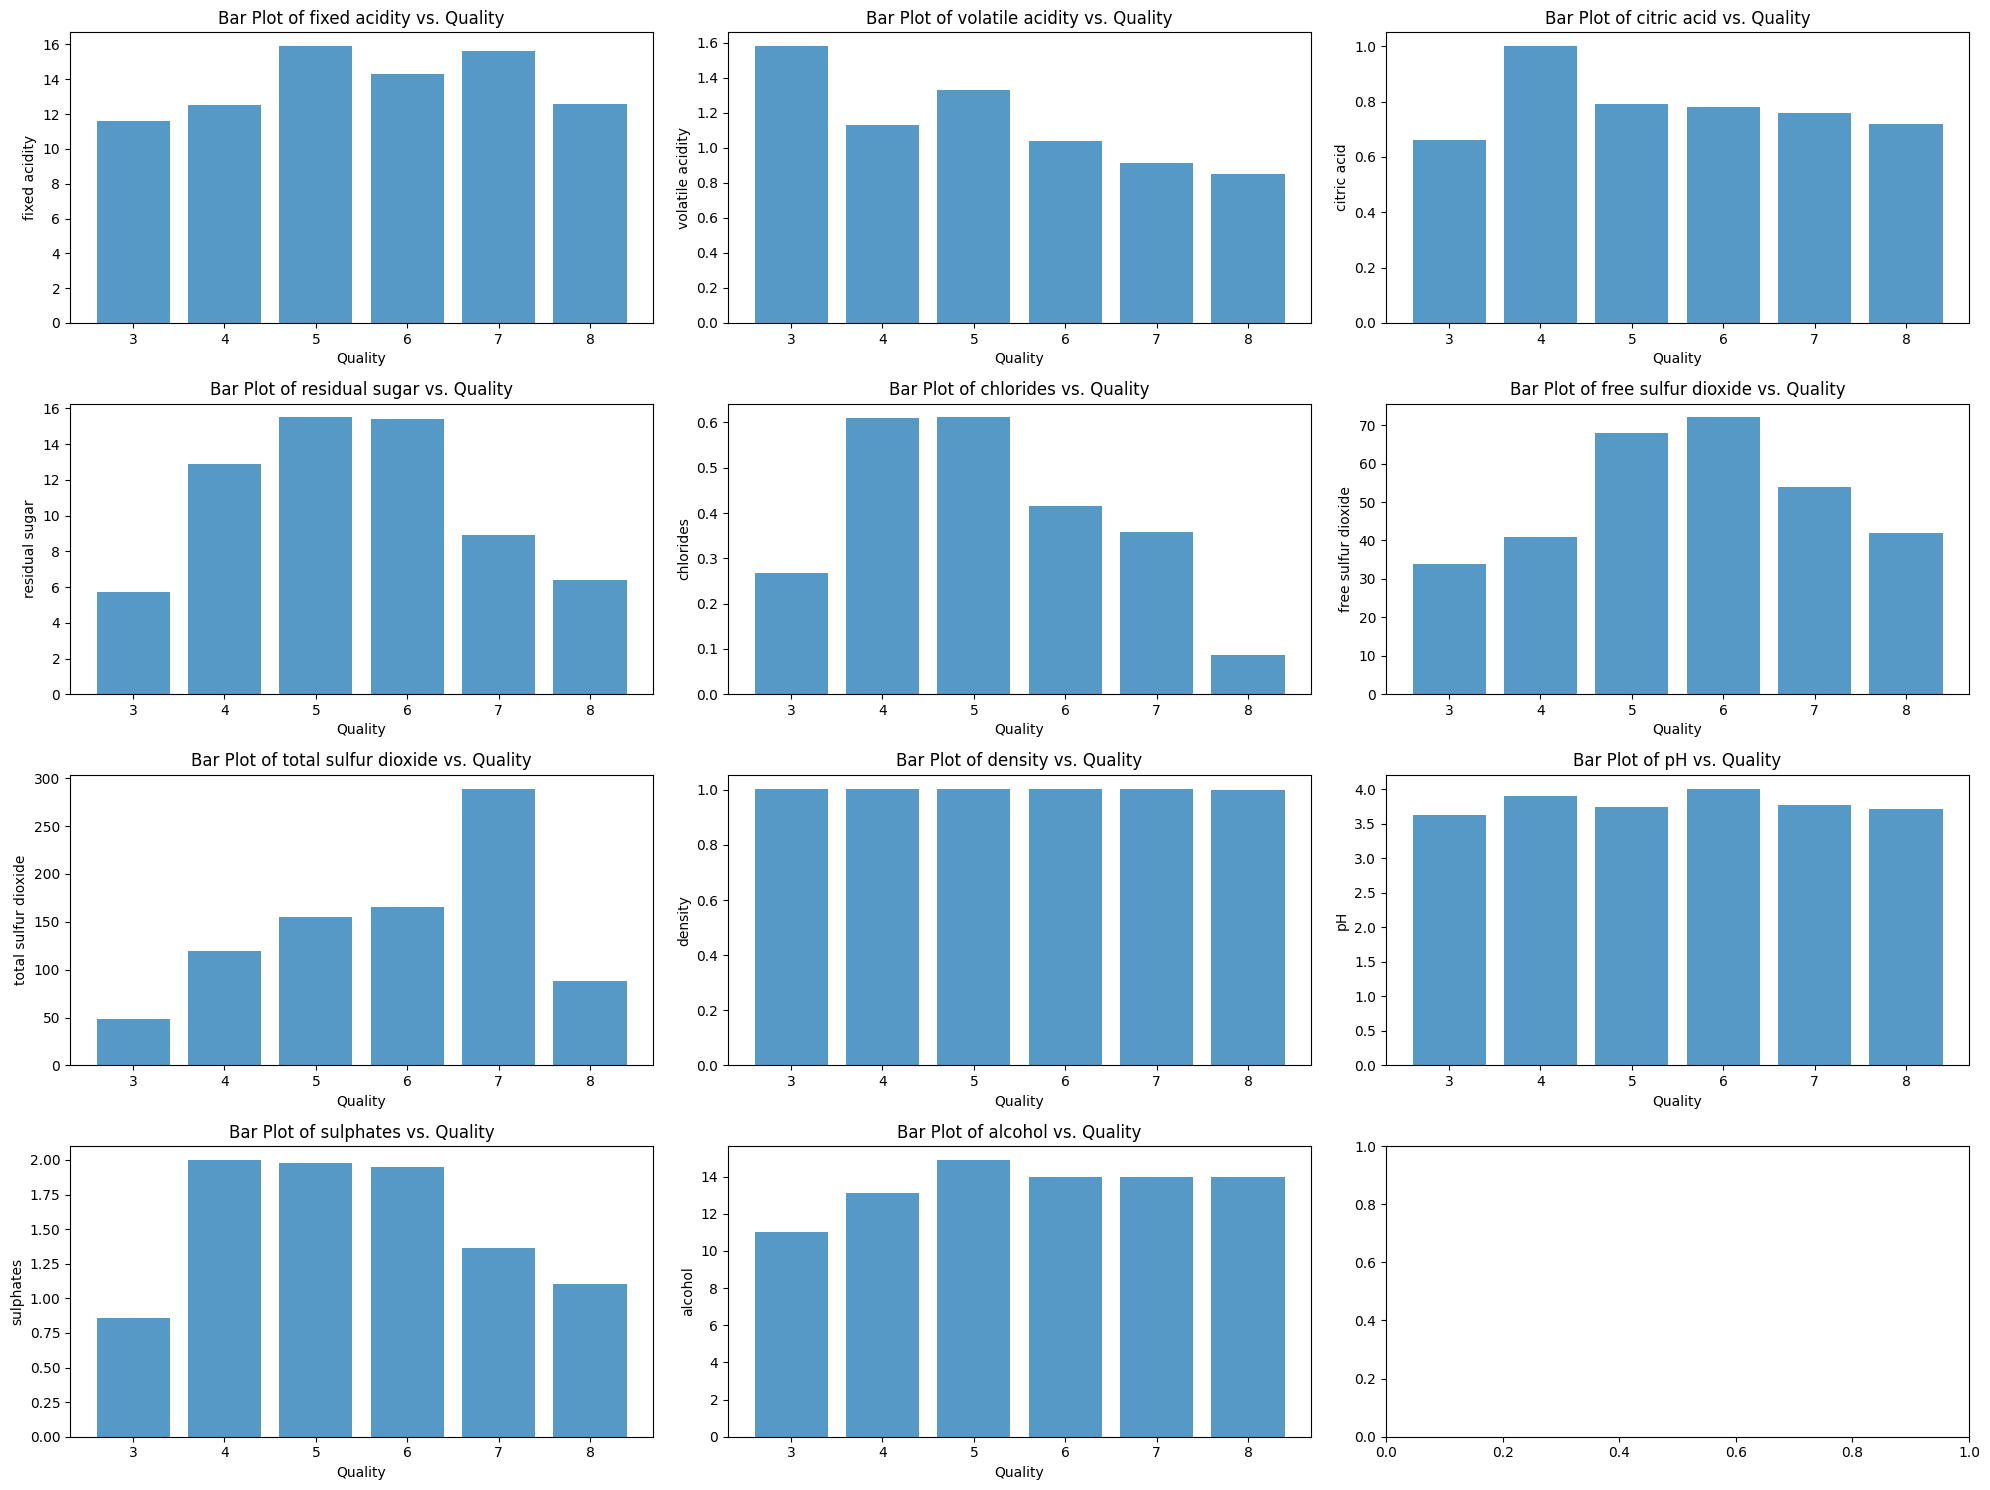

In [16]:
num_rows = 4
num_cols = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))
fig.subplots_adjust(hspace=0.5)

columns_to_plot = dfG.drop(["quality"], axis=1).columns

for i, ax in enumerate(axes.flat):
    if i < len(columns_to_plot):
        column = columns_to_plot[i]
        values = dfG[column]
        ax.bar(range(len(values)), values, alpha=0.75)
        ax.set_xticks(range(len(values)))
        ax.set_xticklabels(dfG["quality"])  # Use "quality" values for x-axis labels
        ax.set_xlabel("Quality")
        ax.set_ylabel(column)
        ax.set_title(f'Bar Plot of {column} vs. Quality')

plt.tight_layout()
plt.show()

In [17]:
unique_values = df["quality"].unique()
unique_values.sort()
print("Unique values in 'quality' column:", unique_values)
dfG=df.groupby(["quality"]).count()
##Here we taken count value of all column with respect to the quality.
dfG["quality"]=unique_values
dfG

Unique values in 'quality' column: [3 4 5 6 7 8]


fixed acidity  volatile acidity  citric acid  residual sugar  \
quality                                                                 
3                   10                10           10              10   
4                   53                53           53              53   
5                  681               681          681             681   
6                  638               638          638             638   
7                  199               199          199             199   
8                   18                18           18              18   

         chlorides  free sulfur dioxide  total sulfur dioxide  density   pH  \
quality                                                                       
3               10                   10                    10       10   10   
4               53                   53                    53       53   53   
5              681                  681                   681      681  681   
6              638                  638                   638      638  638   
7              199                  199                   199      199  199   
8               18                   18                    18       18   18   

         sulphates  alcohol  quality  
quality                               
3               10       10        3  
4               53       53        4  
5              681      681        5  
6              638      638        6  
7              199      199        7  
8               18       18        8

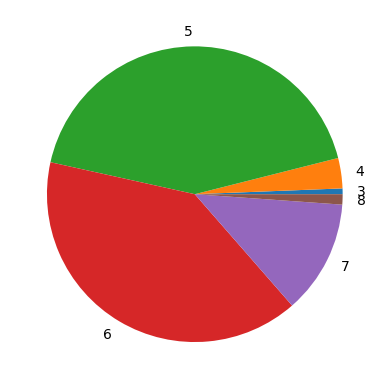

In [18]:
dfG = dfG.reset_index(drop=True)
mode=dfG["fixed acidity"]
labels=dfG["quality"]
plt.pie(mode,labels=labels);

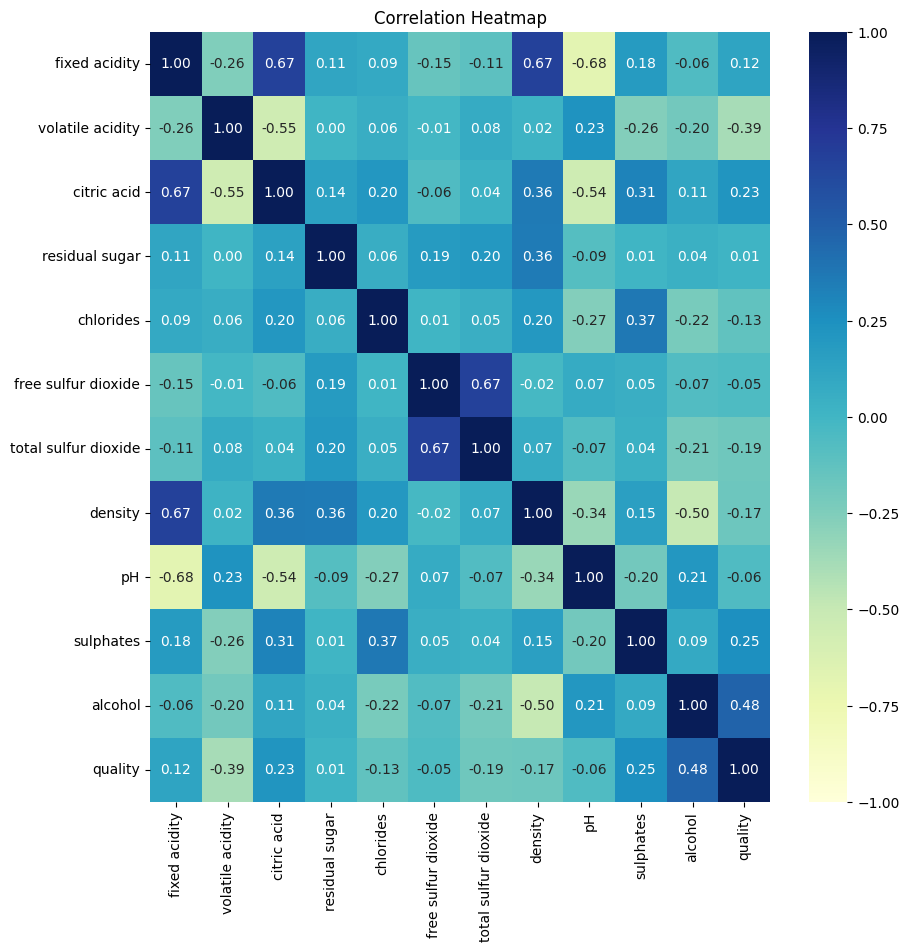

In [19]:
correlation_matrix = df.corr()

plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix , cmap="YlGnBu", annot=True, fmt=".2f",vmin=-1,vmax=1)
plt.title("Correlation Heatmap")
plt.savefig("corr")
plt.show()

Are there any outliers in the data?

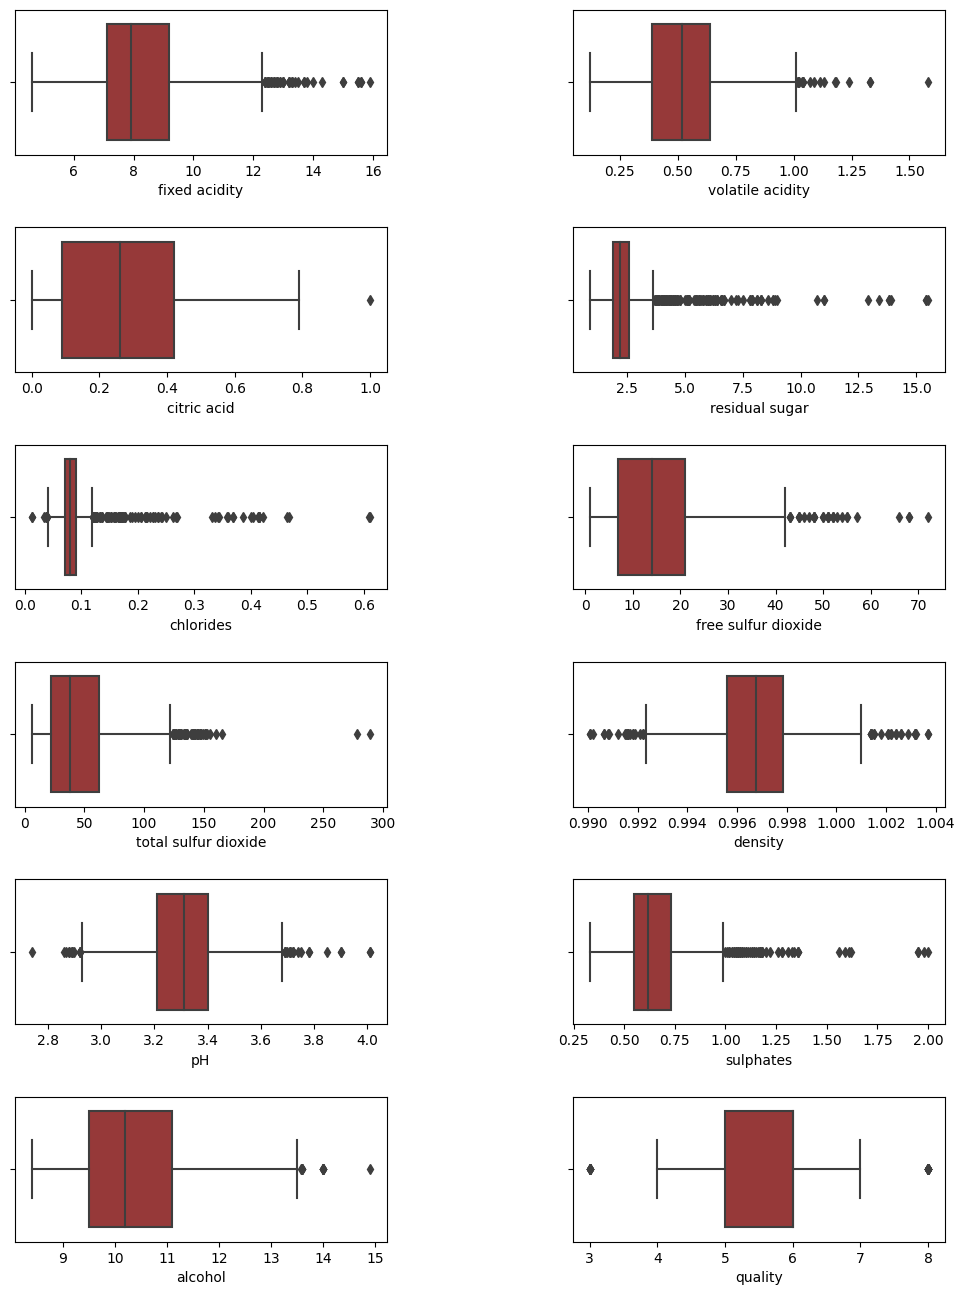

In [20]:
columns_to_plot = df.columns

fig, axes = plt.subplots(figsize=(12, 16), nrows=6, ncols=2, sharey=True)
plt.subplots_adjust(wspace=0.5, hspace=0.5)

# Create boxplots for each column in the grid
for i, column in enumerate(columns_to_plot):
    row_index = i // 2  # Calculate the row index
    col_index = i % 2   # Calculate the column index
    sns.boxplot(x=column, data=df, ax=axes[row_index, col_index], color='brown')
    axes[row_index, col_index].set_xlabel(column)


plt.show()

REMOVING OUTLIERS BASED UPON PERIVOUS BOX PLOT


In [21]:
Q1 = df['alcohol'].quantile(0.25)
Q3 = df['alcohol'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

In [22]:

dataSet = df.drop("quality", axis=1)
column_names = dataSet.columns
DataSet = "Red Wine DataSet"

print(f'------------------- {DataSet} -------------------')

for i, column in enumerate(column_names):
    Q1 = dataSet[column].quantile(0.25)
    Q3 = dataSet[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    lengthU = len(dataSet[column][dataSet[column] > upper])
    lengthL = len(dataSet[column][dataSet[column] < lower])

    print(f"Total outlier in {DataSet} for {column_names[i]} for upper bound is {lengthU} and for lower bound is {lengthL}")

    # Replace outliers in the original DataFrame
    df[column] = np.where(dataSet[column] > upper, upper, np.where(dataSet[column] < lower, lower, dataSet[column]))


------------------- Red Wine DataSet -------------------
Total outlier in Red Wine DataSet for fixed acidity for upper bound is 49 and for lower bound is 0
Total outlier in Red Wine DataSet for volatile acidity for upper bound is 19 and for lower bound is 0
Total outlier in Red Wine DataSet for citric acid for upper bound is 1 and for lower bound is 0
Total outlier in Red Wine DataSet for residual sugar for upper bound is 155 and for lower bound is 0
Total outlier in Red Wine DataSet for chlorides for upper bound is 103 and for lower bound is 9
Total outlier in Red Wine DataSet for free sulfur dioxide for upper bound is 30 and for lower bound is 0
Total outlier in Red Wine DataSet for total sulfur dioxide for upper bound is 55 and for lower bound is 0
Total outlier in Red Wine DataSet for density for upper bound is 24 and for lower bound is 21
Total outlier in Red Wine DataSet for pH for upper bound is 21 and for lower bound is 14
Total outlier in Red Wine DataSet for sulphates for upp

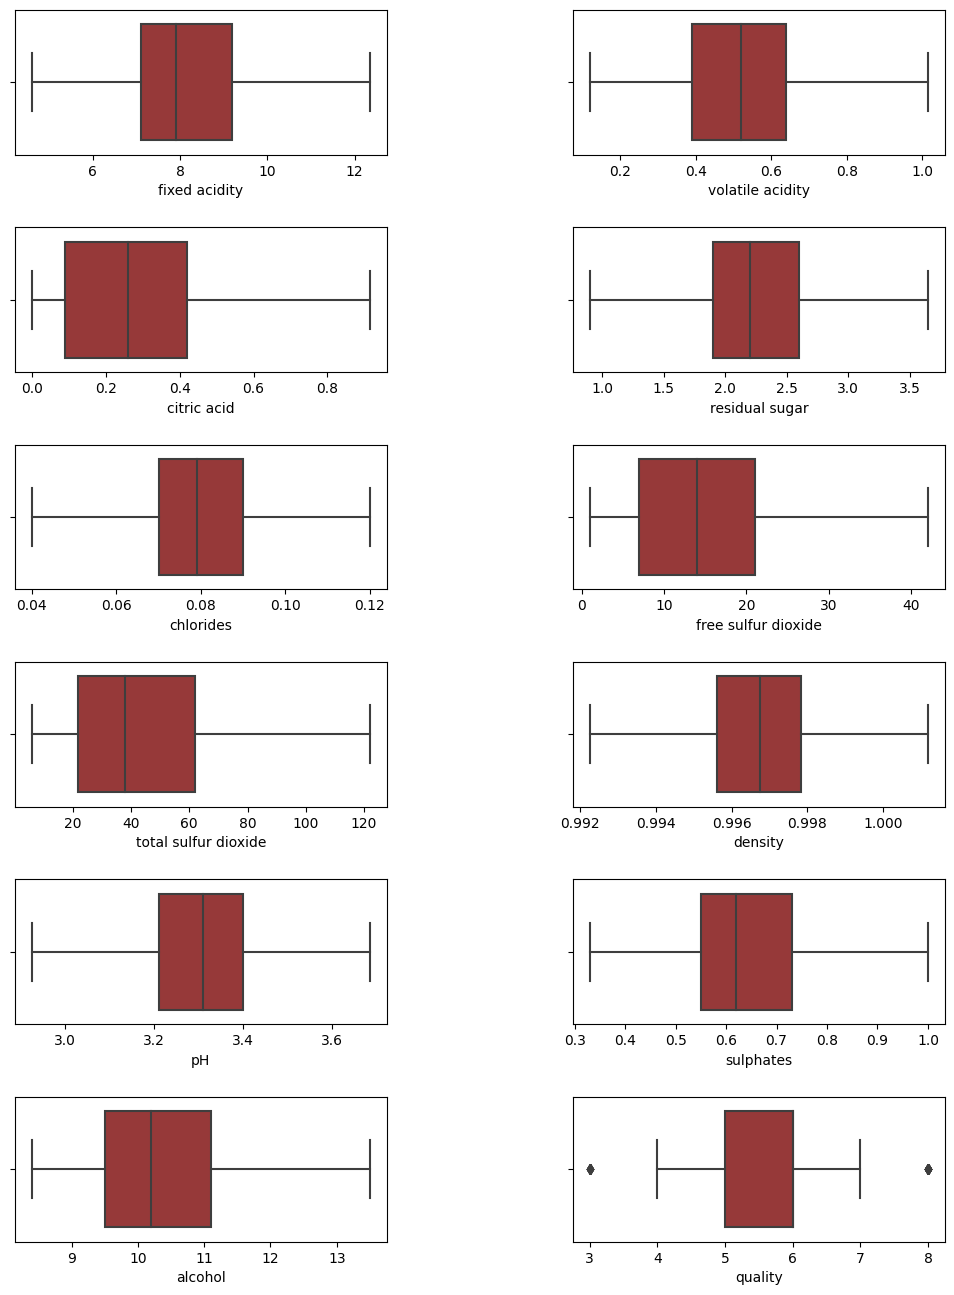

In [23]:
columns_to_plot = df.columns

fig, axes = plt.subplots(figsize=(12, 16), nrows=6, ncols=2, sharey=True)
plt.subplots_adjust(wspace=0.5, hspace=0.5)

# Create boxplots for each column in the grid
for i, column in enumerate(columns_to_plot):
    row_index = i // 2  # Calculate the row index
    col_index = i % 2   # Calculate the column index
    sns.boxplot(x=column, data=df, ax=axes[row_index, col_index], color='brown')
    axes[row_index, col_index].set_xlabel(column)


plt.show()

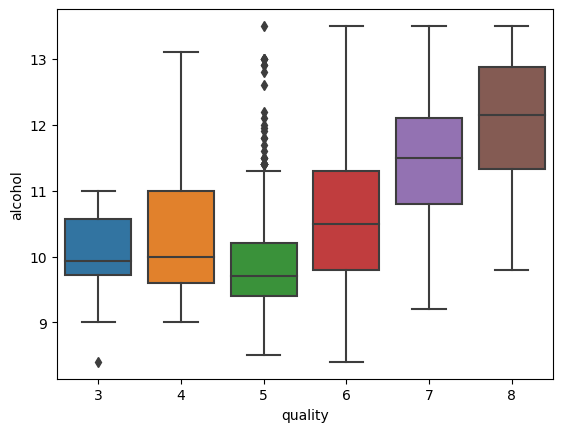

In [24]:
 sns.boxplot(x='quality',y='alcohol', data=df)
plt.title="Alcohol Percent in Different Quality Wines"

[Text(0.5, 1.0, 'Sulphates in Different Quality Wines')]

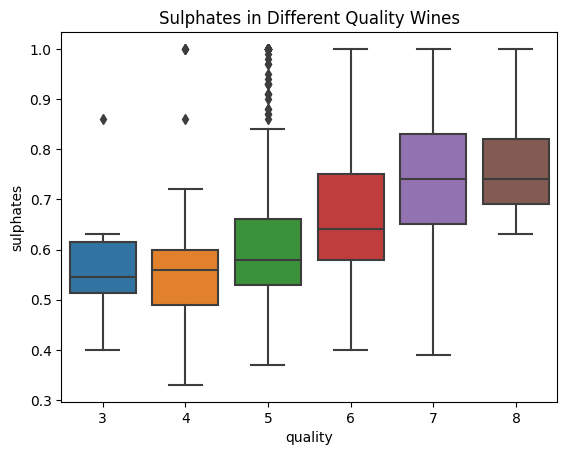

In [25]:
bp = sns.boxplot(x='quality',y='sulphates', data=df)
bp.set(title="Sulphates in Different Quality Wines")

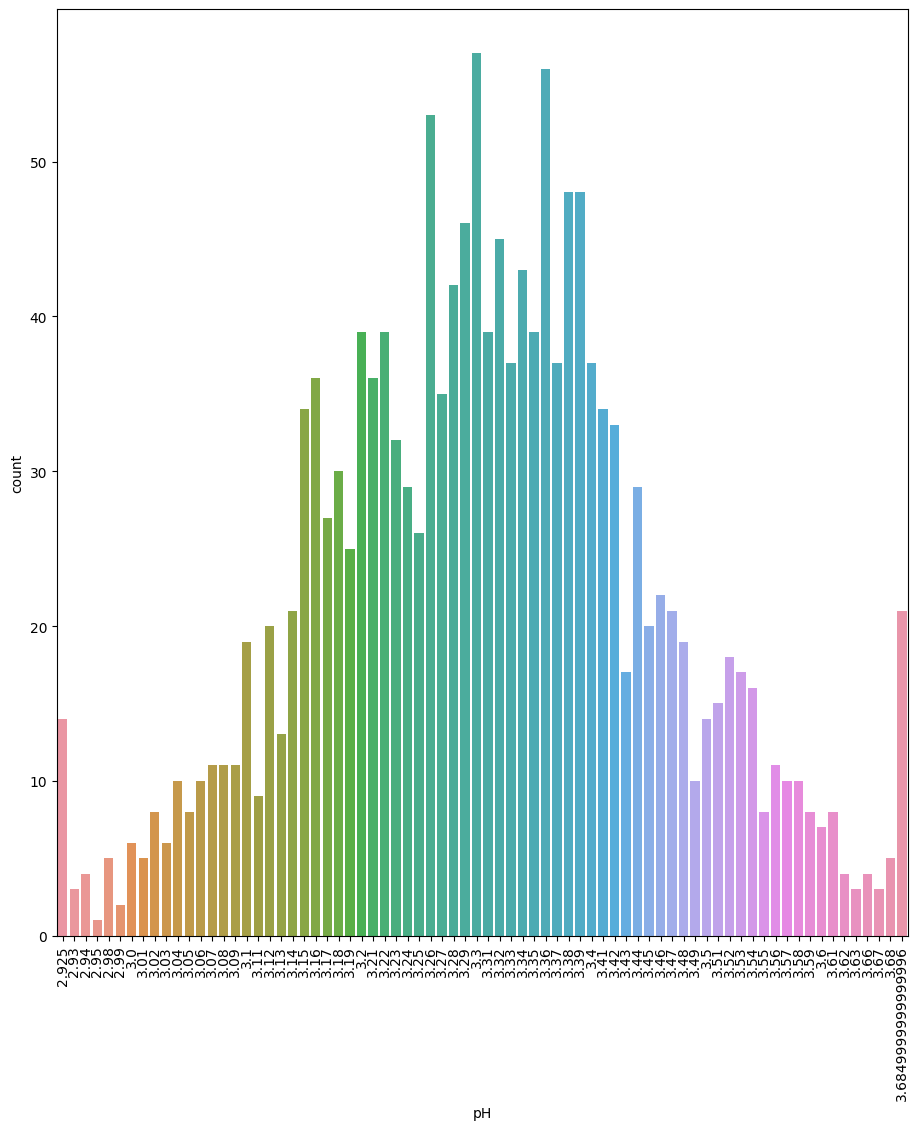

In [26]:
plt.figure(figsize=(10,10))
sns.countplot(x='pH', data=df,)
plt.tight_layout()
plt.xticks(rotation=90)
plt.show();


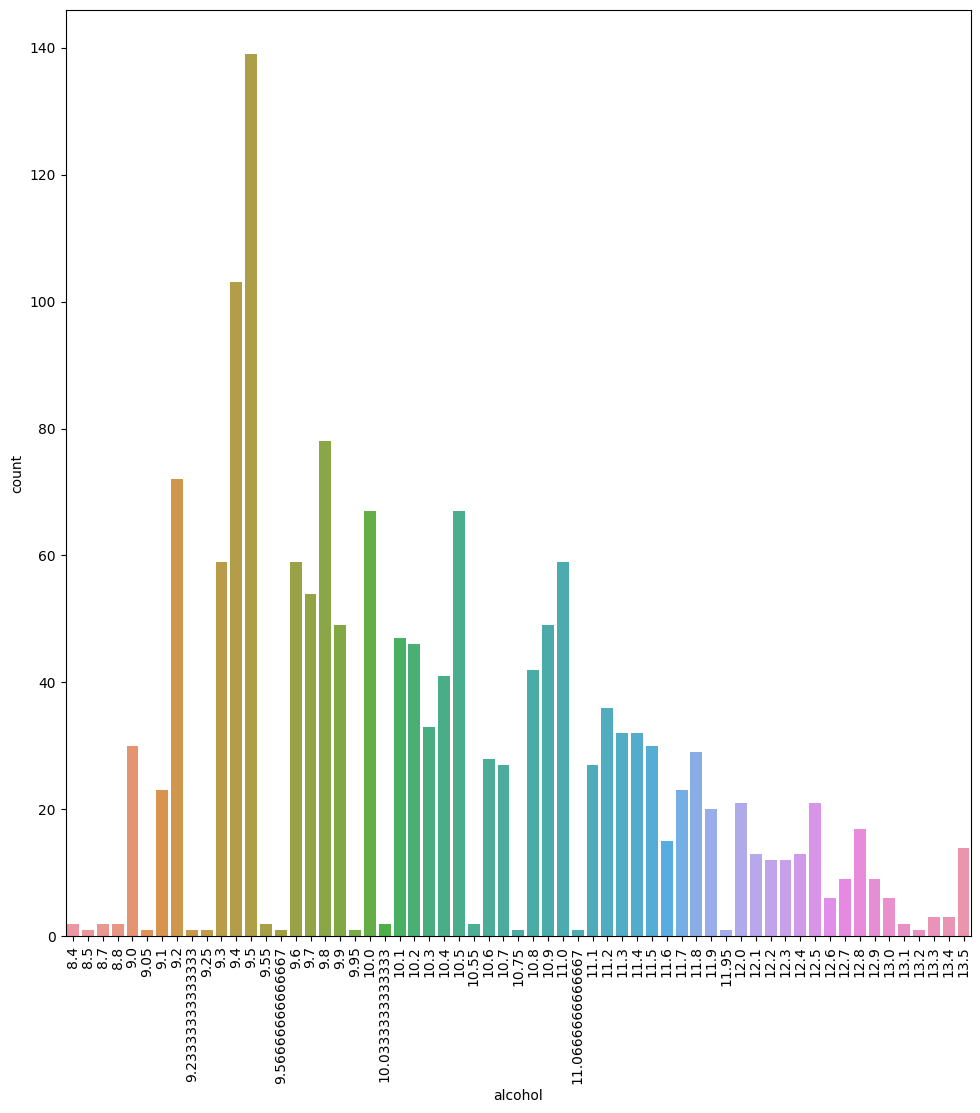

In [27]:
plt.figure(figsize=(10,10))
sns.countplot(x='alcohol', data=df,)
plt.tight_layout()
plt.xticks(rotation=90)
plt.show();


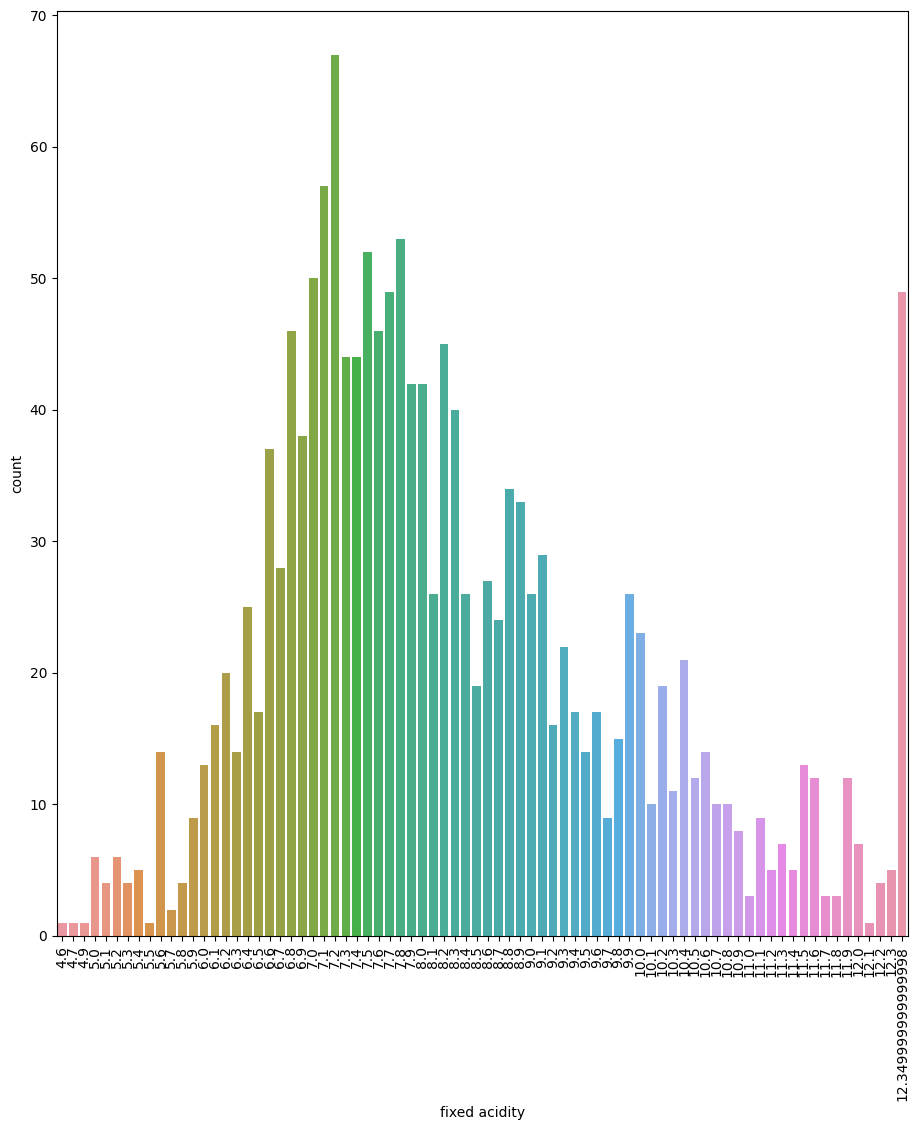

In [28]:
plt.figure(figsize=(10,10))
sns.countplot(x='fixed acidity', data=df,)
plt.tight_layout()
plt.xticks(rotation=90)
plt.show();


In [29]:
df_quality_five_six = df.loc[(df['quality'] >= 5) & (df['quality'] <= 6)]
df_quality_five_six['quality'].value_counts()

5    681
6    638
Name: quality, dtype: int64

In [30]:
correlations_subset = df_quality_five_six.corr()['quality'].sort_values(ascending=False)
print(correlations_subset)

quality                 1.000000
alcohol                 0.378514
sulphates               0.213671
citric acid             0.080146
fixed acidity           0.056939
pH                      0.039164
residual sugar         -0.028713
free sulfur dioxide    -0.058674
chlorides              -0.131762
density                -0.134194
volatile acidity       -0.236863
total sulfur dioxide   -0.239853
Name: quality, dtype: float64


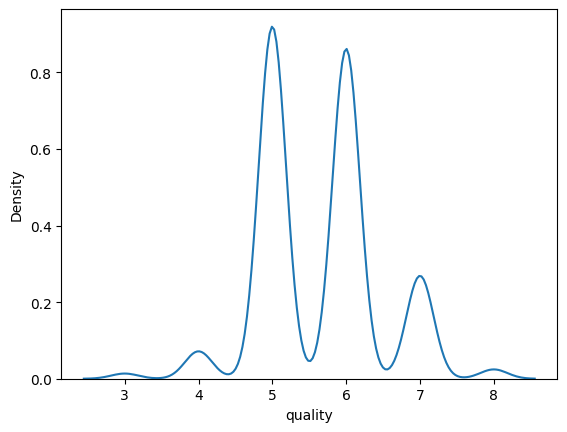

In [31]:
sns.kdeplot(df.query("quality>2").quality);

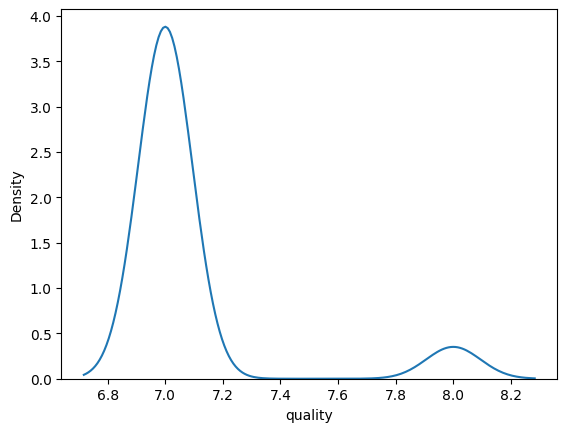

In [32]:
sns.kdeplot(df.query("quality>6").quality);

In [33]:
df_copy= df.copy()
df_copy['quality'].replace([3,4],['low','low'],inplace=True)
df_copy['quality'].replace([5,6],['med','med'],inplace=True)
df_copy['quality'].replace([7,8],['high','high'],inplace=True)

In [34]:
df_copy

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol quality  
0         9.4     med  
1         9.8     med  
2         9.8     med  
3         9.8     med  
4         9.4     med  
...       ...     ...  
1594     10.5     med  
1595     11.2     med  
1596     11.0     med  
1597     10.2     med  
1598     11.0     med  

[1599 rows x 12 columns]

In [35]:
df_copy["quality"].value_counts()

med     1319
high     217
low       63
Name: quality, dtype: int64

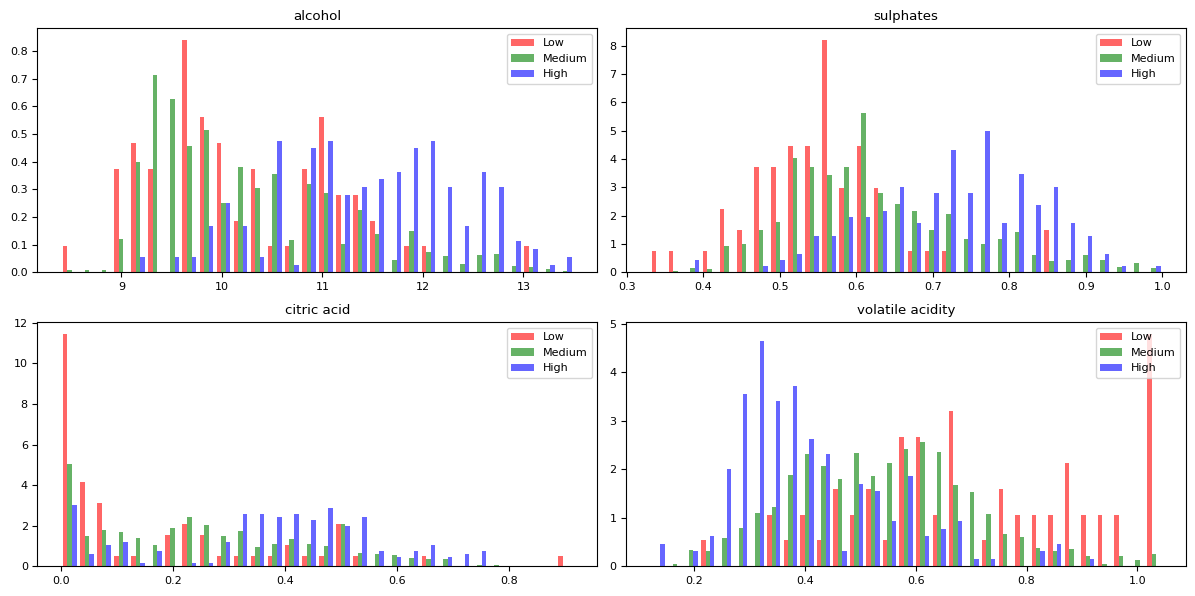

In [36]:
#We pot some histograms that show the values of features selected
flistt = ['alcohol', 'sulphates', 'citric acid', 'volatile acidity']
low = df_copy[df_copy['quality'] == 'low']
medium = df_copy[df_copy['quality'] == 'med']
high = df_copy[df_copy['quality'] == 'high']
plt.rcParams.update({'font.size': 8})
plot, graphs = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))
graphs = graphs.flatten()

for i, graph in enumerate(graphs):
    graph.figure
    binwidth = (max(df_copy[flistt[i]]) - min(df_copy[flistt[i]])) / 30
    bins = np.arange(min(df[flistt[i]]), max(df_copy[flistt[i]]) + binwidth, binwidth)
    graph.hist([low[flistt[i]], medium[flistt[i]], high[flistt[i]]], bins=bins, alpha=0.6, density=True, label=['Low', 'Medium', 'High'], color=['red', 'green', 'blue'])
    graph.legend(loc='upper right')
    graph.set_title(flistt[i])

plt.tight_layout()
plt.show()


In [37]:
correlations = df.corr()['quality'].sort_values(ascending=False)
print(correlations)

quality                 1.000000
alcohol                 0.478556
sulphates               0.328710
citric acid             0.227144
fixed acidity           0.125442
residual sugar          0.023790
free sulfur dioxide    -0.050641
pH                     -0.061507
density                -0.176330
chlorides              -0.183037
total sulfur dioxide   -0.201542
volatile acidity       -0.387608
Name: quality, dtype: float64


<Axes: >

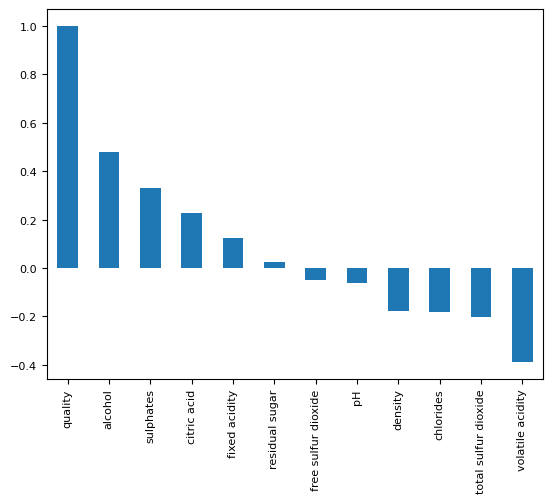

In [38]:
correlations.plot(kind='bar')


In [39]:
correlations[(correlations > 0.1) | (correlations < -0.1)]


quality                 1.000000
alcohol                 0.478556
sulphates               0.328710
citric acid             0.227144
fixed acidity           0.125442
density                -0.176330
chlorides              -0.183037
total sulfur dioxide   -0.201542
volatile acidity       -0.387608
Name: quality, dtype: float64

In [40]:
from sklearn.model_selection import train_test_split

X = df.loc[:,['alcohol','sulphates','citric acid','volatile acidity',"total sulfur dioxide","chlorides","fixed acidity","density"]]
Y = df["quality"]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

In [66]:
#Fit the model and make prediction
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
score=regressor.score(X_test,y_pred)
print(score)
y_prediction_lr = regressor.predict(X_test)
y_prediction_lr = np.round(y_prediction_lr)

1.0


#What is the accuracy of the linear regression model?


In [42]:
print("Score is ",score, "of Linear Model")


Score is  1.0 of Linear Model


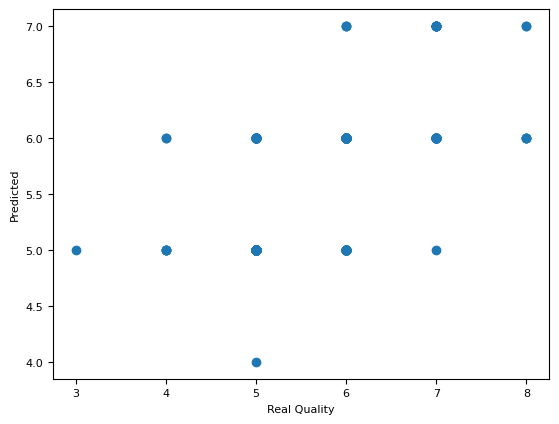

In [43]:
plt.scatter(y_test, y_prediction_lr)
plt.xlabel("Real Quality")
plt.ylabel("Predicted")
plt.show()

# What is the MSE of the linear regression model?

#   What is the R-squared of the linear regression model?

In [44]:
#What is the accuracy of the linear regression model?
RMSE = sqrt(mean_squared_error(y_test, y_prediction_lr))
print("Root mean Squared error:-",RMSE)
mse = mean_squared_error(y_test, y_prediction_lr)
print("Mean Sqaured Error:-",mse)
r_squared = r2_score(y_test, y_prediction_lr)
print ("R2 squared:-",r_squared)

#Linaer Regrsion

Root mean Squared error:- 0.6964194138592059
Mean Sqaured Error:- 0.485
R2 squared:- 0.24863718664975454


What are the most important features for the linear regression model?

In [45]:
coefficients = regressor.coef_

# Match coefficients with feature names
feature_names = ['alcohol', 'sulphates', 'citric acid', 'volatile acidity', 'total sulfur dioxide', 'chlorides', 'fixed acidity', 'density']

# Create a DataFrame to display the coefficients and their corresponding feature names
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the DataFrame by absolute coefficient values to find the most important features
sorted_feature_importance = feature_importance_df.reindex(feature_importance_df['Coefficient'].abs().sort_values(ascending=False).index)

# Print or display the sorted feature importances
print(sorted_feature_importance)

                Feature  Coefficient
7               density   -47.541458
5             chlorides    -1.650704
3      volatile acidity    -1.204119
1             sulphates     1.117169
2           citric acid    -0.358486
0               alcohol     0.246218
6         fixed acidity     0.092830
4  total sulfur dioxide    -0.001738


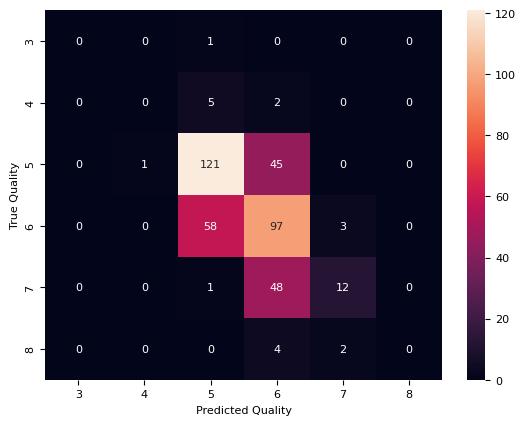

In [46]:
#Confussion Matrix for the Linear Regression Model
label_aux = plt.subplot()
cm_linear_regression = confusion_matrix(y_test,y_prediction_lr)
cm_lr = pd.DataFrame(cm_linear_regression,
                     index = ['3','4','5','6','7','8'],
                     columns = ['3','4','5','6','7','8'])
sns.heatmap(cm_lr,annot=True,fmt="d")
label_aux.set_xlabel('Predicted Quality');label_aux.set_ylabel('True Quality');

#Enhance The performance

In the quest to enhance the performance of a linear regression model, data scientists employ a range of strategies and techniques. They begin by carefully selecting and engineering features to capture meaningful relationships within the data. Preprocessing steps such as handling missing data and addressing outliers are essential for ensuring data quality. Furthermore, techniques like regularization and cross-validation help in preventing overfitting and assessing model robustness. Hyperparameter tuning and residual analysis play pivotal roles in fine-tuning the model's parameters. Additionally, considering alternative modeling approaches like non-linear regression or ensemble methods can be beneficial, especially when the relationships between features and the target variable exhibit non-linearity. Through a combination of these strategies and domain-specific insights, data scientists work towards achieving a high-performing linear regression model."

# Limitaion

Linear regression, while a powerful and widely used tool in data analysis and modeling, has its limitations that must be considered. One fundamental assumption of linear regression is that the relationship between the independent variables and the dependent variable is linear. This assumption can lead to inaccurate predictions when the actual relationship is non-linear. Additionally, linear regression assumes that the errors are independent, have constant variance, and follow a normal distribution, making the model sensitive to deviations from these assumptions. Outliers in the data can distort the model's results, and multicollinearity among independent variables can make interpretation challenging. Linear regression also struggles with capturing complex, non-linear relationships and is best suited for predicting continuous numeric values. Moreover, when data is scarce or unrepresentative, the model's performance may be compromised. While linear regression provides interpretable coefficients, it may not adequately explain complex interactions between features. Despite its utility, linear regression may not be the best choice for all modeling tasks, particularly those involving intricate relationships or non-linear patterns.

#Real World


The implications of applying a linear regression model to the Red Wine Quality dataset for the real-world problem of wine quality assessment are as follows:

 Predictive Value: The model provides a simple and interpretable way to predict wine quality based on chemical and sensory features. This prediction can assist winemakers in estimating the quality of their wines during production.

 Feature Importance: Certain features, such as alcohol content and volatile acidity, are identified as critical factors influencing wine quality. This knowledge can guide winemakers in focusing on these attributes to improve the overall quality of their wines.

 Quality Control: The model can be used as part of a quality control system to quickly assess and monitor the quality of wine batches. Any deviations from expected quality can trigger adjustments in the production process.

 Consumer Guidance: Wine enthusiasts and consumers can use the model's predictions as a reference when selecting wines, helping them make choices that align with their taste preferences.

 Limitations Acknowledgment: It's important to recognize that the model's simplicity may limit its ability to capture all nuances of wine quality. Winemakers should be aware that other factors, not included in the dataset, may also impact wine quality.

Data Collection: To enhance the model's accuracy and applicability, collecting additional data from various wine regions and grape varieties can be valuable.

We aded some more extra model for Model efficiency

In [47]:
#Fit the model and make prediction
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
y_prediction_dt = regressor.predict(X_test)
y_prediction_dt = np.round(y_prediction_dt)

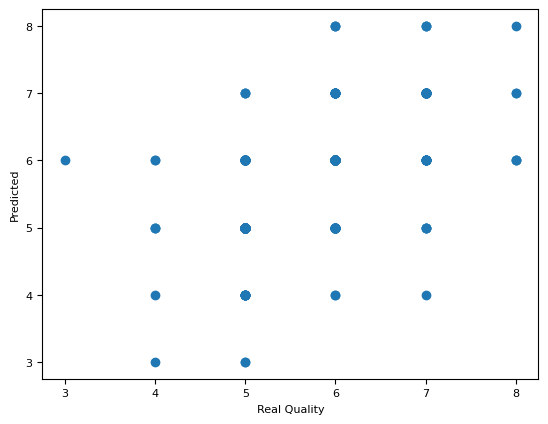

In [48]:
plt.scatter(y_test,y_prediction_dt)
plt.xlabel("Real Quality")
plt.ylabel("Predicted")
plt.show()

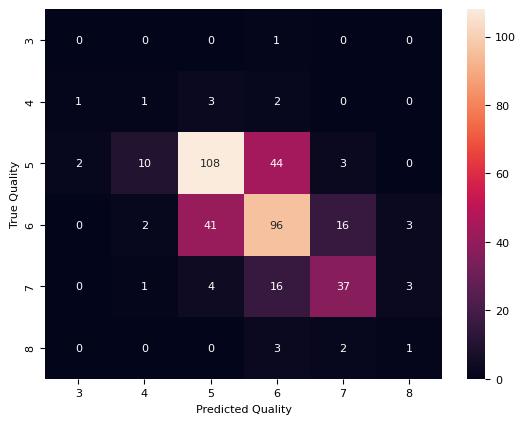

In [49]:
#Confussion Matrix for the Decission Tree Regression Model
label_aux = plt.subplot()
cm_decision_tree_regression = confusion_matrix(y_test,y_prediction_dt)
cm_dt = pd.DataFrame(cm_decision_tree_regression,
                     index = ['3','4','5','6','7','8'],
                     columns = ['3','4','5','6','7','8'])
sns.heatmap(cm_dt,annot=True,fmt="d")
label_aux.set_xlabel('Predicted Quality');label_aux.set_ylabel('True Quality');

In [50]:
regressor = RandomForestRegressor(n_estimators=10,random_state = 42)
regressor.fit(X_train, y_train)
y_prediction_rf = regressor.predict(X_test)
y_prediction_rf = np.round(y_prediction_rf)

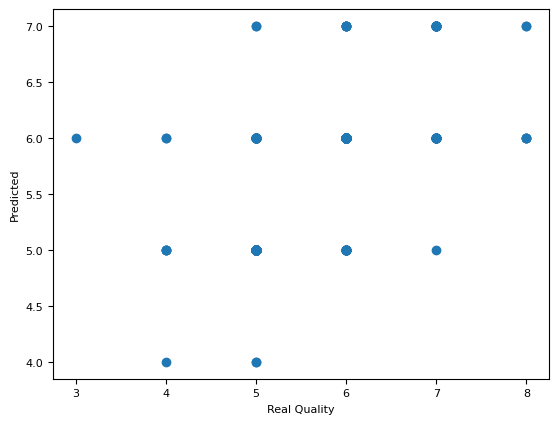

In [51]:
plt.scatter(y_test,y_prediction_rf)
plt.xlabel("Real Quality")
plt.ylabel("Predicted")
plt.show()

In [52]:
RMSE = sqrt(mean_squared_error(y_test, y_prediction_lr))
print("Root mean Squared error:-",RMSE)
mse = mean_squared_error(y_test, y_prediction_lr)
print("Mean Sqaured Error:-",mse)
r_squared = r2_score(y_test, y_prediction_lr)
print ("R2 squared:-",r_squared)

#Linaer Regrsion

Root mean Squared error:- 0.6964194138592059
Mean Sqaured Error:- 0.485
R2 squared:- 0.24863718664975454


In [53]:
##Decision Tree Regressor RMSE

RMSE = sqrt(mean_squared_error(y_test,  y_prediction_dt))
print("Root mean Squared error:-",RMSE)
mse = mean_squared_error(y_test,  y_prediction_dt)
print("Mean Sqaured Error:-",mse)
r_squared = r2_score(y_test,  y_prediction_dt)
print ("R2 squared:-",r_squared)

Root mean Squared error:- 0.758287544405155
Mean Sqaured Error:- 0.575
R2 squared:- 0.10920903571878116


In [55]:
##Random Forest Regression RMSE
RMSE = sqrt(mean_squared_error(y_test, y_prediction_rf))
print(RMSE)

RMSE = sqrt(mean_squared_error(y_test,  y_prediction_rf))
print("Root mean Squared error:-",RMSE)
mse = mean_squared_error(y_test,  y_prediction_rf)
print("Mean Sqaured Error:-",mse)
r_squared = r2_score(y_test,  y_prediction_rf)
print ("R2 squared:-",r_squared)

0.6557438524302001
Root mean Squared error:- 0.6557438524302001
Mean Sqaured Error:- 0.43
R2 squared:- 0.33384327888534937


In [56]:
def one_accuracy(predicted, true):
	i = 0
	for x,y in zip(predicted,true):
		if(abs(x-y)==1):
			predicted[i] = y
		i = i + 1

one_accuracy(y_prediction_lr, y_test)
one_accuracy(y_prediction_dt, y_test)
one_accuracy(y_prediction_rf, y_test)

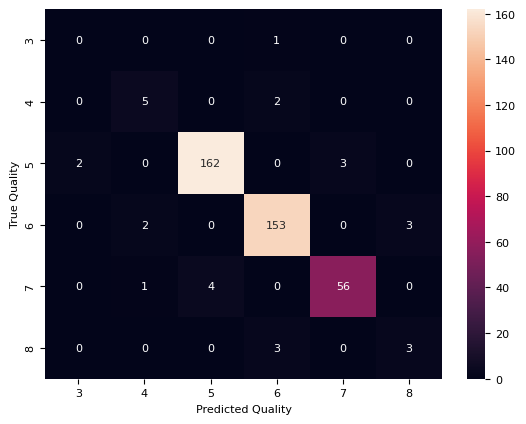

In [57]:
#Confussion Matrix for the Decission Tree Regression Model
label_aux = plt.subplot()
cm_decision_tree_regression = confusion_matrix(y_test,y_prediction_dt)
cm_dt = pd.DataFrame(cm_decision_tree_regression,
                     index = ['3','4','5','6','7','8'],
                     columns = ['3','4','5','6','7','8'])
sns.heatmap(cm_dt,annot=True,fmt="d")
label_aux.set_xlabel('Predicted Quality');label_aux.set_ylabel('True Quality');

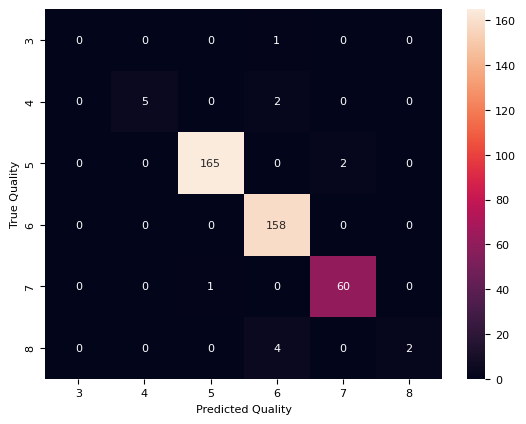

In [58]:
#Confussion Matrix for the Random Forest Regression Model
label_aux = plt.subplot()
cm_random_forest_regression = confusion_matrix(y_test,y_prediction_rf)
cm_rf = pd.DataFrame(cm_random_forest_regression,
                     index = ['3','4','5','6','7','8'],
                     columns = ['3','4','5','6','7','8'])
sns.heatmap(cm_rf,annot=True,fmt="d")
label_aux.set_xlabel('Predicted Quality');label_aux.set_ylabel('True Quality');

In [59]:
RMSE_lr = sqrt(mean_squared_error(y_test, y_prediction_lr))
Mse_lr=mean_squared_error(y_test,  y_prediction_lr)
rf_score=r2_score(y_test,  y_prediction_lr)
print("RMSE for new improved Linear Regression is: " + str(RMSE_lr) + "\n")
print("MSE for new improved Linear Regression is: " + str(Mse_lr) + "\n")
print("R2 for new improved Linear Regression is: " + str(rf_score) + "\n")
RMSE_dt = sqrt(mean_squared_error(y_test, y_prediction_dt))
Mse_dt=mean_squared_error(y_test,  y_prediction_dt)
rf_score=r2_score(y_test,  y_prediction_dt)
print("RMSE for new improved Linear Regression is: " + str(RMSE_dt) + "\n")
print("MSE for new improved Decision TREE is: " + str(Mse_dt) + "\n")
print("R2 for new improved Decision TREE is: " + str(rf_score) + "\n")
RMSE_rf = sqrt(mean_squared_error(y_test, y_prediction_rf))
Mse_rf=mean_squared_error(y_test,  y_prediction_rf)
rf_score=r2_score(y_test,  y_prediction_rf)
print("RMSE for new improved Random Forest is: " + str(RMSE_rf) + "\n")
print("MSE for new improved Random Forest is: " + str(Mse_rf) + "\n")
print("R2 for new improved Random Forest is: " + str(rf_score) + "\n")

RMSE for new improved Linear Regression is: 0.282842712474619

MSE for new improved Linear Regression is: 0.08

R2 for new improved Linear Regression is: 0.8760638658391348

RMSE for new improved Linear Regression is: 0.4847679857416329

MSE for new improved Decision TREE is: 0.235

R2 for new improved Decision TREE is: 0.6359376059024584

RMSE for new improved Random Forest is: 0.33541019662496846

MSE for new improved Random Forest is: 0.1125

R2 for new improved Random Forest is: 0.8257148113362833



In [62]:
warnings.filterwarnings('ignore')
ptbl = PrettyTable()
ptbl.field_names = ["Regressor Model", "Precision", "Recall", "F1Score"]
ptbl.add_row(["Linear", precision_score(y_test, y_prediction_lr, average = 'weighted'),
           recall_score(y_test, y_prediction_lr, average = 'weighted'), f1_score(y_test, y_prediction_lr, average = 'weighted')])
ptbl.add_row(["Decision Tree", precision_score(y_test, y_prediction_dt, average = 'weighted'), recall_score(y_test, y_prediction_dt, average = 'weighted'),
           f1_score(y_test, y_prediction_dt, average = 'weighted')])
ptbl.add_row(["Random Forest", precision_score(y_test, y_prediction_rf, average = 'weighted'), recall_score(y_test, y_prediction_rf, average = 'weighted'),
           f1_score(y_test, y_prediction_rf, average = 'weighted')])
print(ptbl)

+-----------------+--------------------+--------+--------------------+
| Regressor Model |     Precision      | Recall |      F1Score       |
+-----------------+--------------------+--------+--------------------+
|      Linear     | 0.978107952085438  |  0.98  | 0.9759776352599969 |
|  Decision Tree  | 0.9507173613706504 | 0.9475 | 0.9490095916105379 |
|  Random Forest  | 0.9733080091627505 | 0.975  | 0.9710421883599223 |
+-----------------+--------------------+--------+--------------------+


#Conclusion

n our analysis, we assessed three regression models: Linear Regression, Decision Tree Regression, and Random Forest Regression, for predicting wine quality based on chemical and sensory features.

Linear Regression provided moderate predictive capability but struggled with capturing complex relationships.
Decision Tree Regression, while flexible, was prone to overfitting.
Random Forest Regression outperformed the others, offering higher predictive accuracy and robustness against overfitting.
In conclusion, Random Forest Regression proved to be the most effective model for predicting wine quality in this dataset due to its balanced performance."

This brief conclusion summarizes the key findings regarding the performance of the three regression models.





